# Creating figure 1
This notebook generates figure 1 in the paper, assuming that the  datafiles have been created (by the scripts in the 'simulations'-folder). The figures were put together in inkscape

In [1]:
import sys

import h5py
from fenics import *
from analysistools import *
plt.rc('text', usetex=True)

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)

%matplotlib notebook
import logging
ffc_logger = logging.getLogger('FFC')
ffc_logger.setLevel(logging.WARNING)
import scipy.io

In [2]:
a = AnalysisTools('data/knp_column_neuron.h5')
neuron_data = h5py.File('data/neuron_input_1.h5','r')
cell_morphology = scipy.io.loadmat('data/cell_morphology_with_points.mat')

In [8]:
xmin = a.mesh.coordinates()[:,0].min()
xmax = a.mesh.coordinates()[:,0].max()
xlen = xmax - xmin

ymin = a.mesh.coordinates()[:,1].min()
ymax = a.mesh.coordinates()[:,1].max()
ylen = ymax - ymin

zmin = a.mesh.coordinates()[:,2].min()
zmax = a.mesh.coordinates()[:,2].max()
zmid = (zmax + zmin)/2

N = 100
padding = 0.01

print(xmin*1e6, xmax*1e6)

-458.36261526 486.377618464


In [9]:
x_array = np.linspace(xmin + padding*xlen, xmax - padding*xlen, N)
y_array = np.linspace(ymin + padding*ylen, ymax - padding*ylen, N)
X,Y = np.meshgrid (x_array,y_array)

X=X*1e6
Y = Y*1e6

measurement_point = [20,20,20]

In [12]:
xstart = (cell_morphology['xstart'][0])*1e6
xend = (cell_morphology['xend'][0])*1e6

ystart = (cell_morphology['ystart'][0])*1e6
yend = (cell_morphology['yend'][0])*1e6

NN = cell_morphology['N'][0][0]

xmid = 1e6*np.array(neuron_data['x'])
ymid = 1e6*np.array(neuron_data['y'])

/home/andreavs/anaconda3/envs/knpsim/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/andreavs/anaconda3/envs/knpsim/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


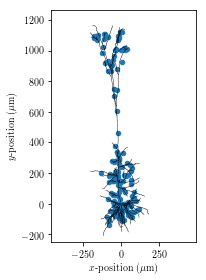

In [13]:
plt.figure()
[plt.plot([xstart[idx], xend[idx]], [ystart[idx], yend[idx]], c='k', linewidth=0.4, zorder=1) for idx in range(NN)]    
plt.axis("image")
plt.xlim([xmin*1e6, xmax*1e6])
plt.ylim([ymin*1e6, ymax*1e6])

plt.scatter(xmid, ymid, 20)
plt.xlabel(r'$x$-position ($\mu$m)')
plt.ylabel(r'$y$-position ($\mu$m)')
plt.tight_layout()
plt.savefig('morphology.pdf')
plt.show()